 ![picture](https://drive.google.com/uc?export=view&id=1KaUW3_JAieeY7WVNfoRiTSr2JsaeAcXi)

# **Reclutamiento de Empleados con Aprendizaje Automático | Colocación Laboral con Python | Sistema de Adquisición de Talento en RR.HH.**

En el mundo acelerado de hoy, las empresas buscan constantemente formas innovadoras para optimizar sus procesos, y la gestión de recursos humanos (RR.HH.) no es una excepción. Los métodos de reclutamiento tradicionales suelen ser consumidores de tiempo y carecen de la eficiencia necesaria para identificar a los mejores candidatos para el trabajo. Sin embargo, con los avances en aprendizaje automático y análisis de datos, los profesionales de RR.HH. ahora tienen herramientas poderosas a su disposición para revolucionar el proceso de reclutamiento.




## **Entendimiento del Proyecto:**
El proyecto está diseñado para aprovechar las técnicas de ML para predecir colocaciones laborales basadas en varios factores, como el rendimiento académico, la experiencia laboral, la especialización, y más.

Al analizar los datos históricos de empleados anteriores, el sistema busca identificar patrones y correlaciones que puedan predecir si un candidato es probable que sea colocado o no.

In [124]:
import numpy as np
import pandas as pd

In [131]:
df = pd.read_csv("https://raw.githubusercontent.com/germaingarcia/Files_Lectures/main/Placement_Data_Full_Class.csv")

In [72]:
# mostramos la estructura del dataframe : head

## **Diccionario**

1. **Sl_no**: Número de serie o identificador único para cada entrada o persona.
2. **gender**: Género del individuo.
3. **ssc_p**: Porcentaje obtenido en los exámenes de secundaria (SSC suele referirse a Secondary School Certificate).
4. **ssc_b**: Junta o comité organizador de los exámenes de secundaria.
5. **hsc_p**: Porcentaje obtenido en los exámenes de educación superior secundaria (HSC se refiere a Higher Secondary Certificate).
6. **hsc_b**: Junta o comité organizador de los exámenes de educación superior secundaria.
7. **hsc_s**: Especialización o área de estudio en la educación superior secundaria (ciencias, comercio, arte, etc.).
8. **degree_p**: Porcentaje obtenido en el grado universitario.
9. **degree_t**: Tipo de grado o campo de estudio en la educación universitaria (por ejemplo, tecnología, artes, comercio).
10. **workex**: Experiencia laboral (generalmente indicado como 'Yes' o 'No').
11. **etest_p**: Porcentaje obtenido en un examen de prueba, posiblemente un examen de empleabilidad o habilidades específicas.
12. **specialisation**: Especialización en estudios de posgrado, especialmente en programas de MBA.
13. **mba_p**: Porcentaje obtenido en el programa de MBA.
14. **status**: Estado del empleo o resultado del proceso de selección (como 'employed' o 'unemployed').
15. **salary**: Salario ofrecido o actual del individuo.



In [132]:
#Analizamos que variables no ayudan y lo eliminamos: ssc_b','hsc_b','hsc_s','degree_t','salary
#Código aquí
df.drop(columns=['ssc_b','hsc_b','hsc_s','degree_t','salary'], inplace=True)

In [133]:
tmp=df
df.head()

,sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
0,1,M,67.00,91.00,58.00,No,55.0,Mkt&HR,58.80,Placed
1,2,M,79.33,78.33,77.48,Yes,86.5,Mkt&Fin,66.28,Placed
2,3,M,65.00,68.00,64.00,No,75.0,Mkt&Fin,57.80,Placed
3,4,M,56.00,52.00,52.00,No,66.0,Mkt&HR,59.43,Not Placed
4,5,M,85.80,73.60,73.30,No,96.8,Mkt&Fin,55.50,Placed


## Preprocessing

## Encoding

 Limpiar y preparar el conjunto de datos para el análisis. Esto incluye manejar valores faltantes, codificar variables categóricas y escalar características numéricas.

In [134]:
# codigica genero, experiencia de trabajo, estatus y especialización
# Puedes usar esta celda como punto de partida
print(df['specialisation'].unique())
print(df['status'].unique())
print(df['workex'].unique())
print(df['gender'].unique())

['Mkt&HR' 'Mkt&Fin']
['Placed' 'Not Placed']
['No' 'Yes']
['M' 'F']


In [135]:
specialisation_mapping = {'Mkt&HR': 0, 'Mkt&Fin': 1}
status_mapping = {'Placed': 0, 'Not Placed': 1}
workex_mapping = {'No': 0, 'Yes': 1}
gender_mapping = {'M': 0, 'F': 1}

df['specialisation'] = df['specialisation'].map(specialisation_mapping)
df['status'] = df['status'].map(status_mapping)
df['workex'] = df['workex'].map(workex_mapping)
df['gender'] = df['gender'].map(gender_mapping)

df.head()

,sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
0,1,0,67.00,91.00,58.00,0,55.0,0,58.80,0
1,2,0,79.33,78.33,77.48,1,86.5,1,66.28,0
2,3,0,65.00,68.00,64.00,0,75.0,1,57.80,0
3,4,0,56.00,52.00,52.00,0,66.0,0,59.43,1
4,5,0,85.80,73.60,73.30,0,96.8,1,55.50,0


In [136]:
print(df['specialisation'].unique())
print(df['status'].unique())
print(df['workex'].unique())
print(df['gender'].unique())

[0 1]
[0 1]
[0 1]
[0 1]


In [137]:
df.head()

,sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
0,1,0,67.00,91.00,58.00,0,55.0,0,58.80,0
1,2,0,79.33,78.33,77.48,1,86.5,1,66.28,0
2,3,0,65.00,68.00,64.00,0,75.0,1,57.80,0
3,4,0,56.00,52.00,52.00,0,66.0,0,59.43,1
4,5,0,85.80,73.60,73.30,0,96.8,1,55.50,0


# Balance Dataset


In [138]:
df['status'].value_counts()

status
0    148
1     67
Name: count, dtype: int64

In [139]:
from sklearn.utils import resample

minority_class = df[df['status'] == 0]
majority_class = df[df['status'] == 1]

minority_class_upsampled = resample(minority_class, 
                                    replace=True,     
                                    n_samples=len(majority_class),    
                                    random_state=42)

balanced_data = pd.concat([majority_class, minority_class_upsampled])



In [140]:
balanced_data['status'].value_counts()

status
1    67
0    67
Name: count, dtype: int64

# Train Test Split

In [141]:
# Separación de feature y target
X = balanced_data.copy().drop('status', axis=1)
y = balanced_data['status']


In [142]:
#Train Test Split con test_size=0.3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (93, 9)
Forma de X_test: (41, 9)
Forma de y_train: (93,)
Forma de y_test: (41,)


In [143]:
X_test

,sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p
64,65,0,80.00,73.00,75.00,0,61.00,1,58.78
214,215,0,62.00,58.00,53.00,0,89.00,0,60.22
125,126,1,84.00,73.00,73.00,0,75.00,1,73.33
52,53,1,40.89,45.83,53.00,0,71.20,0,65.49
155,156,0,51.57,74.66,59.90,1,56.15,0,65.99
190,191,1,64.00,70.20,61.00,0,50.00,1,62.50
36,37,0,51.00,44.00,57.00,0,64.00,1,51.45
76,77,1,66.50,70.40,71.93,0,61.00,1,64.27
30,31,1,64.00,73.50,73.00,0,52.00,0,56.70
104,105,0,69.00,63.00,65.00,1,55.00,0,58.23


# Feature Scaling

In [144]:
# scalar las características de x_train y x_test
from sklearn.preprocessing import MinMaxScaler
# Puedes usar esta celda como punto de partida
 
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [145]:
from sklearn.metrics import accuracy_score

# 1 k-nearest neighbor

In [146]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_scaled, y_train)
knn_preds = knn_classifier.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_preds)
print("KNeighborsClassifier Accuracy:", knn_accuracy)
 

KNeighborsClassifier Accuracy: 0.8292682926829268


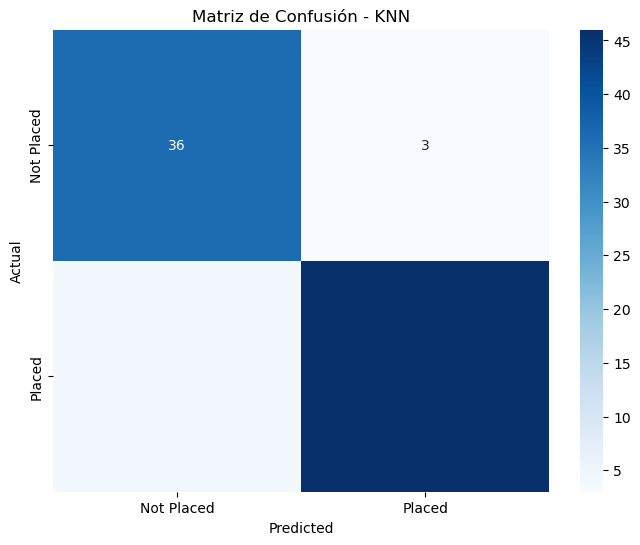

In [147]:
# Matriz de confusión heatmap KNN
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
knn_conf_matrix = confusion_matrix(y_test, knn_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(dt_conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Not Placed', 'Placed'], 
            yticklabels=['Not Placed', 'Placed'])
plt.title('Matriz de Confusión - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Decision Tree

In [148]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_scaled, y_train)
dt_preds = dt_classifier.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, dt_preds)
print("DecisionTreeClassifier Accuracy:", dt_accuracy)

DecisionTreeClassifier Accuracy: 0.8536585365853658


In [149]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

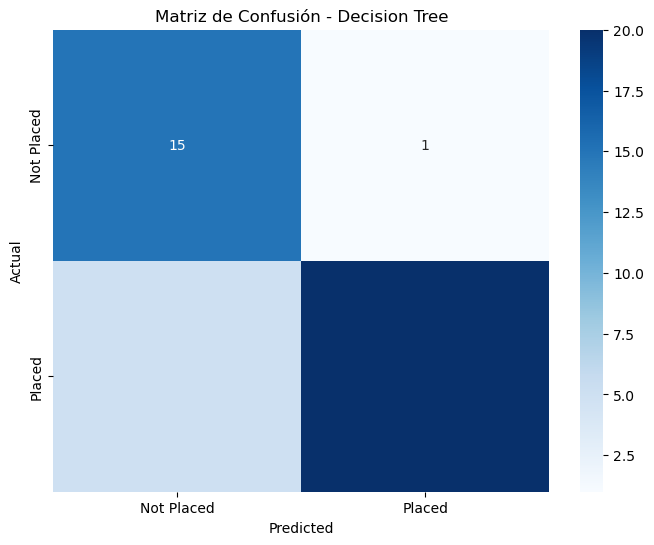

In [150]:
# creating confusion matrix heatmap (Decision Tree)

dt_conf_matrix = confusion_matrix(y_test, dt_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(dt_conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Not Placed', 'Placed'], 
            yticklabels=['Not Placed', 'Placed'])
plt.title('Matriz de Confusión - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# SVM

In [151]:
# Support Vector Machine
from sklearn.svm import SVC
svm_classifier = SVC()
svm_classifier.fit(X_train_scaled, y_train)
svm_preds = svm_classifier.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_preds)
print("SVC Accuracy:", svm_accuracy)

SVC Accuracy: 0.8780487804878049


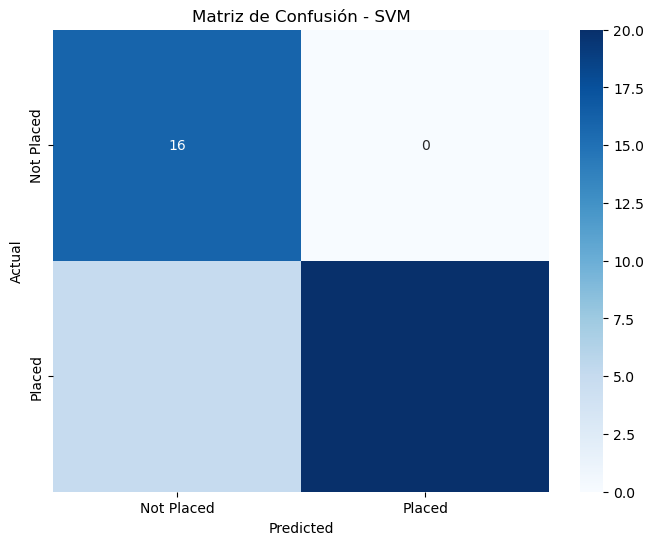

In [152]:
# creating confusion matrix heatmap SVM

svm_conf_matrix = confusion_matrix(y_test, svm_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(svm_conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Not Placed', 'Placed'], 
            yticklabels=['Not Placed', 'Placed'])
plt.title('Matriz de Confusión - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Random Forest

In [153]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_scaled, y_train)
rf_preds = rf_classifier.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_preds)
print("RandomForestClassifier Accuracy:", rf_accuracy)


RandomForestClassifier Accuracy: 0.9024390243902439


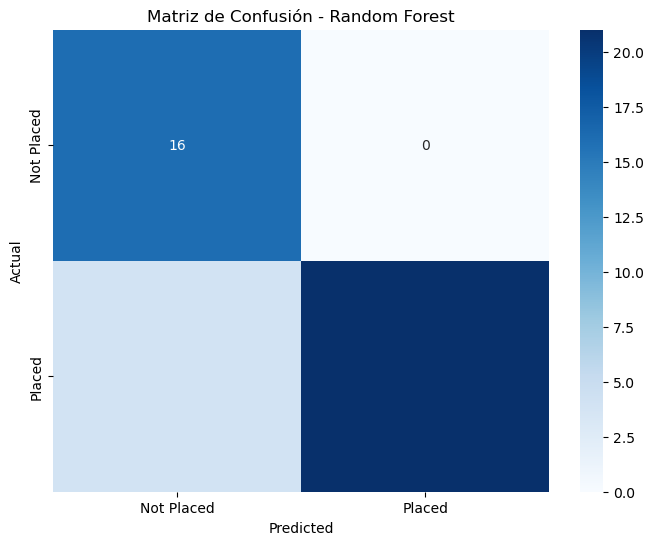

In [154]:
# creating confusion matrix heatmap - Random Forest
rf_conf_matrix = confusion_matrix(y_test, rf_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Not Placed', 'Placed'], 
            yticklabels=['Not Placed', 'Placed'])
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Gaussian Naive Bayes

In [155]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_scaled, y_train)
nb_preds = nb_classifier.predict(X_test_scaled)
nb_accuracy = accuracy_score(y_test, nb_preds)
print("GaussianNB Accuracy:", nb_accuracy)

GaussianNB Accuracy: 0.9024390243902439


# Logistic Regression

In [156]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train_scaled, y_train)
lr_preds = lr_classifier.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_preds)
print("LogisticRegression Accuracy:", lr_accuracy)

LogisticRegression Accuracy: 0.926829268292683


## Single Input Predictions

Test si está prediciendo adecuadamente

In [157]:
tmp.sample(n=10)

,sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
55,56,0,60.40,66.6,65.0,0,71.0,0,52.71,0
10,11,0,58.00,61.0,60.0,1,62.0,0,60.85,0
75,76,1,59.00,62.0,77.5,0,74.0,0,67.00,1
14,15,0,62.00,47.0,50.0,0,76.0,0,54.96,1
120,121,0,58.00,40.0,59.0,0,73.0,0,58.81,1
122,123,1,66.50,66.8,69.3,1,80.4,1,71.00,0
2,3,0,65.00,68.0,64.0,0,75.0,1,57.80,0
25,26,1,52.58,54.6,50.2,1,76.0,1,65.33,1
196,197,0,72.00,63.0,77.5,1,78.0,1,54.48,0
102,103,1,77.00,61.0,68.0,1,57.5,1,61.31,0


In [162]:
sl_no = 185
gender = 'F'
ssc_p = 56.28
hsc_p = 62.83
degree_p = 59.79
workex = 'No'
etest_p = 60.00
specialisation = 'Mkt&HR'
mba_p = 57.29

 
data = [[sl_no, gender, ssc_p, hsc_p, degree_p, workex, etest_p, specialisation, mba_p]]
columns = ['sl_no', 'gender', 'ssc_p', 'hsc_p', 'degree_p', 'workex', 'etest_p', 'specialisation', 'mba_p']
df = pd.DataFrame(data, columns=columns)
print(df)



   sl_no gender  ssc_p  hsc_p  degree_p workex  etest_p specialisation  mba_p
0    185      F  56.28  62.83     59.79     No     60.0         Mkt&HR  57.29


# Sistema de Predicción

In [171]:
def prediction(sl_no, gender, ssc_p, hsc_p, degree_p, workex, etest_p, specialisation, mba_p):
    # Codificar las variables categóricas: gender, workex y specialisation
    data = [[sl_no, gender, ssc_p, hsc_p, degree_p, workex, etest_p, specialisation, mba_p]]
    columns = ['sl_no', 'gender', 'ssc_p', 'hsc_p', 'degree_p', 'workex', 'etest_p', 'specialisation', 'mba_p']
    df = pd.DataFrame(data, columns=columns)

    specialisation_mapping = {'Mkt&HR': 0, 'Mkt&Fin': 1}
    status_mapping = {'Placed': 0, 'Not Placed': 1}
    workex_mapping = {'No': 0, 'Yes': 1}
    gender_mapping = {'M': 0, 'F': 1}
    
    df['specialisation'] = df['specialisation'].map(specialisation_mapping)
    df['workex'] = df['workex'].map(workex_mapping)
    df['gender'] = df['gender'].map(gender_mapping)
    
    df_t = scaler.transform(df)
    prediction = rf_classifier.predict(df_t)

    return prediction

In [172]:
sl_no =11
gender = "F"
ssc_p =58.
hsc_p = 61.
degree_p = 60.
workex = "Yes"
etest_p = 62.
specialisation = "Mkt&Fin"
mba_p = 60.85

result = prediction(sl_no, gender, ssc_p, hsc_p, degree_p, workex, etest_p, specialisation, mba_p)

print(result)

if result == 1:
    print('contratado')

else:
    print('No Contratado')

[1]
contratado



Se emplea un modelo de Clasificador Random Forest para predecir las colocaciones laborales basadas en características de entrada como los puntajes académicos, la experiencia laboral y otros factores relevantes. El modelo se entrena con datos históricos para aprender patrones y hacer predicciones precisas.

# Guardar Archivos

In [174]:
import pickle
pickle.dump(rf_classifier,open('model.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))